# Ford Go-bike share system in San Francisco Bay during Febreuary 2019
## by *Elshaimaa Ismael*

## Investigation Overview

> - This data set includes information about individual rides made in Ford Go-bike sharing system covering the greater San Francisco Bay area during Febreuary 2019.
- The analysis was done to investigate the factors affecting the density of using the bike share system.

## Dataset Overview

> - The cleaned dataset used for analysis include information about 171234 bike users in San Francisco Bay during Febreuary 2019.
- Variables include user type, member gender, member birth year, trip date, and trip duration.

In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [38]:
# load in the dataset into a pandas dataframe
df = pd.read_csv ('201902-fordgobike-tripdata.csv')

# Make a copy for the dataframe before wrangling and cleaning:
bike = df.copy()

# drop rows whose value is NaN from `member_gender` and `start_station_id` columns
bike = bike[bike['member_gender'].notna()]
bike = bike[bike['start_station_id'].notna()]

# Drop all row in `member_gender` column that equal 'Other' 
bike = bike[bike.member_gender != 'Other']

# Drop all row in `member_birth_year` column that are before 1920
bike = bike[bike.member_birth_year >= 1920]

# drop unnecessary columns 
bike.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 
                    'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id'],axis=1, inplace=True)

# reset the index of the bike dataframe
bike.reset_index(drop=True, inplace=True)

# convert `start_time` and `end_time` columns from object to date-time
bike['start_time'] =  pd.to_datetime(bike['start_time'])
bike['end_time'] =  pd.to_datetime(bike['end_time'])

# convert `member_birth_year` column from float to integer
bike['member_birth_year']= bike['member_birth_year'].astype(int)

# Split the 'start_time' datetime column into date column and time column
bike['start_time'],bike['Start_Date']= bike['start_time'].apply(lambda x:x.time()), bike['start_time'].apply(lambda x:x.date())

# Split the 'end_time' datetime column into date column and time column
bike['end_time'],bike['end_Date']= bike['end_time'].apply(lambda x:x.time()), bike['end_time'].apply(lambda x:x.date())

# test
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171234 entries, 0 to 171233
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   duration_sec             171234 non-null  int64 
 1   start_time               171234 non-null  object
 2   end_time                 171234 non-null  object
 3   start_station_name       171234 non-null  object
 4   end_station_name         171234 non-null  object
 5   user_type                171234 non-null  object
 6   member_birth_year        171234 non-null  int64 
 7   member_gender            171234 non-null  object
 8   bike_share_for_all_trip  171234 non-null  object
 9   Start_Date               171234 non-null  object
 10  end_Date                 171234 non-null  object
dtypes: int64(2), object(9)
memory usage: 14.4+ MB


## Distribution of type bike users

> Most users in the dataset (90.6%) are subscribers in the bike share system.

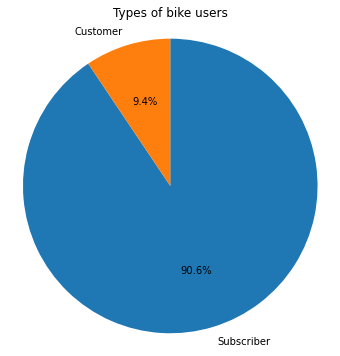

In [39]:
plt.figure(figsize = [18, 6])
# plotting a pie chart for `user_type` column
sorted_counts = bike['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);

# We have the used option `Square`. 
plt.axis('square')

plt.title('Types of bike users', fontsize=12);

## Distribution of gender of bike users

> Most users in the bike share system are Males (76.2%). 


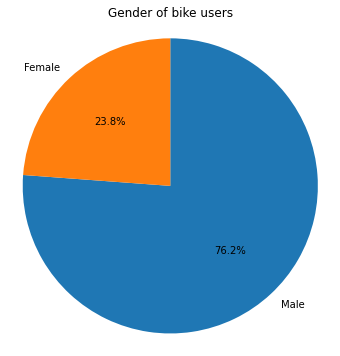

In [40]:
plt.figure(figsize = [18, 6])
# Plot a simple Pie chart for `member_gender` column proportions
sorted_counts = bike['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);

# We have the used option `Square`. 
plt.axis('square')

plt.title('Gender of bike users', fontsize=12);

## Relationship between user age and trip duration

> Users born in late 80s and early 90s are shown to be the most users and most of thier rides were for short durations.



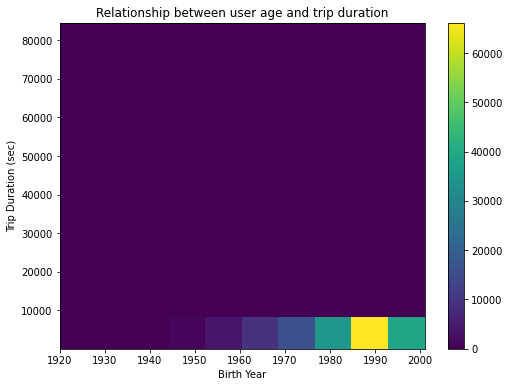

In [11]:
plt.figure(figsize = [18, 6])

plt.subplot(1, 2, 2)
plt.hist2d(data = bike, x = 'member_birth_year', y = 'duration_sec')
plt.colorbar()
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration (sec)')
plt.title('Relationship between user age and trip duration', fontsize=12);

## Relationship between year of birth and bike share for all trip

> New generation (born in mid 90s) tends to use bike share system for all trip in a rate higher than other users.



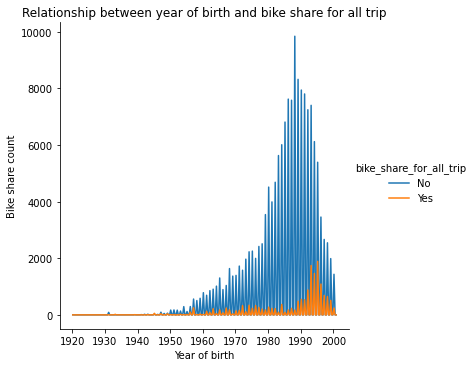

In [12]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(1920, bike['member_birth_year'].max()+1/3, 1/3)
g = sb.FacetGrid(data = bike, hue = 'bike_share_for_all_trip', size = 5)
g.map(freq_poly, "member_birth_year", bins = bin_edges)
g.add_legend()
plt.xlabel('Year of birth')
plt.ylabel('Bike share count')
plt.title('Relationship between year of birth and bike share for all trip', fontsize=12);

## Relationship between year of birth, trip duration, and member gender

> Males take longer bike trips than females, especially mid aged males.

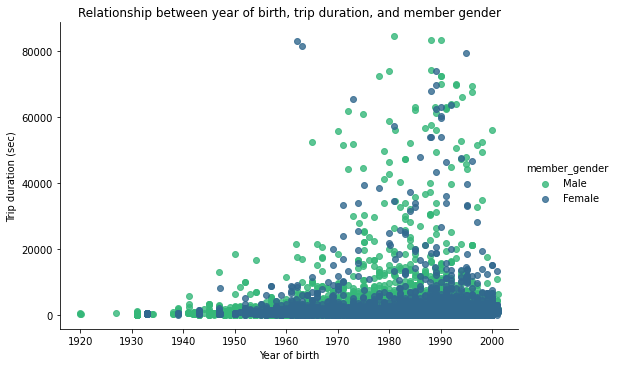

In [13]:
g = sb.FacetGrid(data = bike, hue = 'member_gender', size = 5, aspect = 1.5, palette='viridis_r')
g.map(sb.regplot, 'member_birth_year', 'duration_sec', x_jitter = 0.04, fit_reg = False)
g.add_legend()

plt.xlabel('Year of birth')
plt.ylabel('Trip duration (sec)')
plt.title('Relationship between year of birth, trip duration, and member gender', fontsize=12);

## Relationship between year of birth, trip duration, bike share for all trip, and member gender

> - Customers don't ever use bike share for all trip.
- Bike share for all trip is mostly used for short trips.


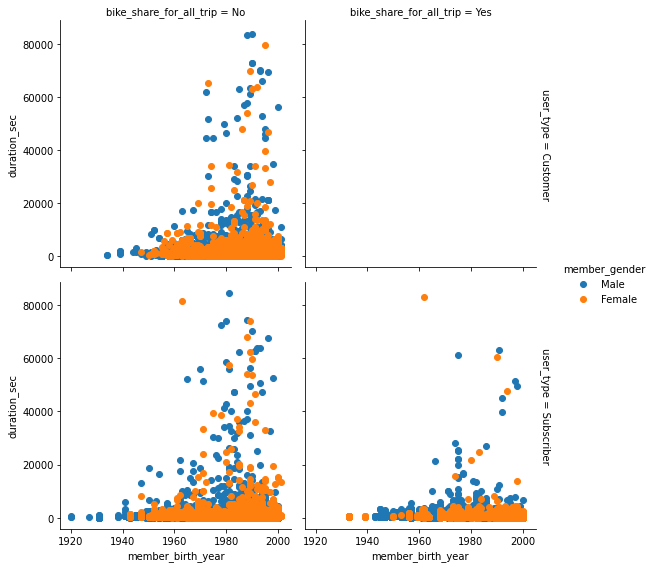

In [36]:
g = sb.FacetGrid(data = bike, col = 'bike_share_for_all_trip', row = 'user_type', size = 4,
                margin_titles = True, hue = 'member_gender')
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend();


In [ ]:
# Code for slide deck presentation
jupyter nbconvert slide_deck_Elshaimaa.ipynb --to slides --post serve --template output-toggle.tpl